# Practical Session 1 - Data Frugality and Imbalanced Data

Welcome to this first practical session of this Frugal AI course. In these practical sessions, we will explore how to build efficient and frugal AI models.

In this first session, we will focus on the data frugality and imbalanced dataset. Hopefully you have access to the Internet and a Jupyter notebook environment to follow along. Whenever you see a `TODO` in the code, it means that you have to complete the code snippet. You can use every resource available online to help you complete the tasks.

We will ask you to return your notebook with the results of the tasks under a pdf format. You can use the `File -> Print Preview` option in Jupyter to generate a pdf file. We will ask you to submit the pdf file to a link I will provide you.

Notebooks are to be submitted by the 15th of October 2024. If you have any questions, feel free to ask me.




# Packages required

The list of packages to install must have been sent beforehand by my colleague:
### Mandatory
- torch-cpu
- transformers
- matplotlib
- numpy
- scikit-learn
- umap-learn

### Optional
- pandas
- tqdm

## The Dataset: Amazon Reviews of Movies and TV Shows

As part of this session, we will use a subset of the Amazon reviews of movies and TV shows dataset. The dataset is available on this [repo] (https://nijianmo.github.io/amazon/index.html). Originally, reviews are scored as integers between 1 and 5. For this session I subsampled and simplified the dataset by only keeping reviews that are correctly formatted, of acceptable size, and I reduced the number of classes to 2 (positive and negative reviews) by mapping negative scores [1.0, 2.0] to negative and positive scores [4.0, 5.0] to positive.

It is stored as a `jsonl.gz` with the following structure (one json per line):

```
{"rating": 1, "review": "I love this movie"},
{"rating": 0, "review": "I hate this movie"},
...
{"rating": 1, "review": "I like this movie"}
```

## Part 1: Dataset Preparation

This part makes sure you're able to load the dataset, and enforce a way to load it. It also makes you subsample the dataset to make it imbalanced.

Tasks:
- 1.1 Load the dataset and display the first 5 rows.  
- 1.2 Display the distribution of the target variable.  
- 1.3 Make the dataset imbalanced by keeping only 5% of the negative reviews.
- 1.4 Display the distribution of labels using a bar chart after making the dataset imbalanced
- 1.5 Save the training set to a new file.

In [ ]:
# 1.1 Load the training dataset and display the first 5 rows
import os
import gzip
import json
import pandas as pd # You can use pandas if you want

path_data = "/home/ed/Dev/CODE_PERSO/TPs-M2-Frugal-AI/data/amazon_movie_reviews/binary"
file = "amazon_movies_subset_train_binary.jsonl.gz"
abs_path_file = os.path.join(path_data, file)

# If using Google Colab
# from google.colab import drive
# drive.mount(path_data)

# TODO: your code here



In [ ]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu --quiet
! pip install transformers pandas numpy scikit-learn umap-learn tqdm matplotlib --quiet

In [ ]:
! cd /content && git clone https://github.com/EvanDufraisse/TPs-M2-Frugal-AI-back.git

In [ ]:
! pip install /content/TPs-M2-Frugal-AI-back --quiet

#### Load the dataset into a variable called `splits`:

During this practical session, we're going to be using different versions of the dataset. We will load the dataset into a variable called `splits` that will be structured as such:

```
splits = {
    "train": {
            "texts": ["I love this movie", "I hate this movie", ...],
            "labels": [1, 0, ...],
            "features": []
    "val": {
            "texts": [],
            "labels": [],
            "features": []
        },
    "test": {
            "texts": [],
            "labels": [],
            "features": []
    },

}


```

The current dataset is balanced, your first task is to load this dataset and store it in the `splits` variable following the above schema.



In [ ]:
# 1.2 Load the train, validation and test datasets


mapping_keys = {
    "review": "texts",
    "rating": "labels",
}
splits = {
    "train": {},
    "val": {},
    "test": {},
}

# TODO: Your code here

In [ ]:
# 1.3 Complete the function below to plot the distribution of labels in the training dataset using a bar plot
# Although the interest is limited in a binary classification problem, it is always good to check the distribution of labels
from typing import List
import matplotlib.pyplot as plt
import numpy as np # (Optional, but recommended)

# Write the function
def plot_rating_histogram(list_labels: List[int]):
    # TODO: your code here
    pass

# Call the function with the list of labels of the training dataset

plot_rating_histogram(splits["train"]["labels"])

You should obtain something similar to this (style et bon goût isn't mandatory :) )
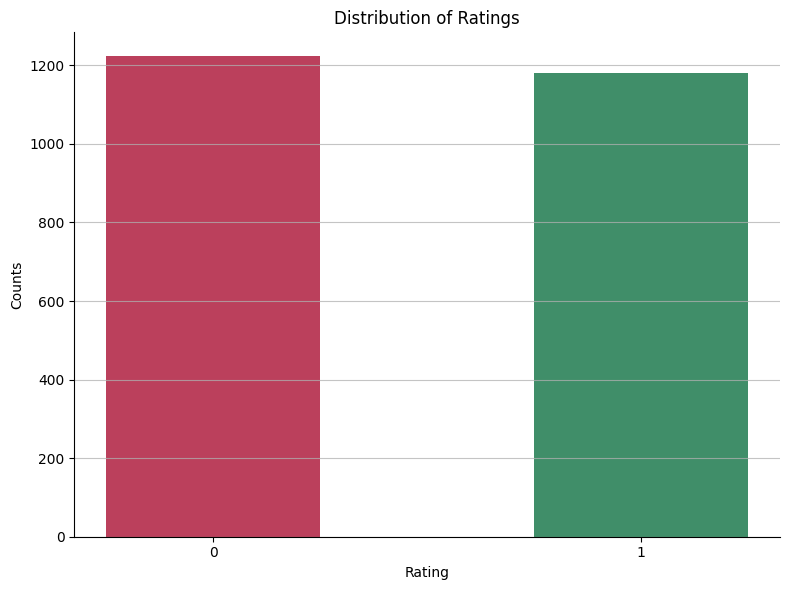

For now the dataset is balanced, we will make an imbalanced version of its training set and validation set in the next task to explore the impacts of imbalanced data models performances.

In [ ]:
# 1.4 Make the dataset imbalanced by removing negative samples so we only keep 5% of them in current training and validation
from typing import Iterable
import random

# Seed for reproducibility
random.seed(42)

def make_imbalanced(splits, proportion:float=0.05):
    """Modifies splits by adding an entry "train_imbalanced" and "validation_imbalanced", with only 5% of the negative samples

    Args:
        splits (dict): A dictionary containing the splits
        proportion (float, optional): proportion of negative labels to keep
    """
    # TODO: your code here
    pass

make_imbalanced(splits, proportion =0.05)

In [ ]:
# 1.4 Plot the distribution of labels of the training and validation sets using a bar chart after making the dataset imbalanced

plot_rating_histogram(splits["train_imbalanced"]["labels"])
plot_rating_histogram(splits["val_imbalanced"]["labels"])

In [ ]:
# Count and print the number of samples in the imbalanced dataset
def label_counter(split):
  # TODO: your code here
  pass
print("Number of samples in the imbalanced dataset: ", label_counter(splits["train_imbalanced"]))
print("Number of samples in the imbalanced dataset: ", label_counter(splits["train_imbalanced"]))

## Part 2: Fitting models on an imbalanced dataset

In this part the aim is to showcase the impact of dataset imbalance on downstream model classification performances. We will concentrate on the following models:
- A four layer MLP
- A 1-NN classifier

In [ ]:
# 2.1 For a fair comparison, downsample the original training set to have the same number of samples as the imbalanced training set. Plot the distribution of labels using a bar chart after downsampling

import random
random.seed(42)

def downsampling_train(splits:dict):
    """Downsamples the original training set to have the same number of samples as the imbalanced training set

    Args:
        splits (dict): A dictionary containing the splits
    """
    # TODO: your code here

    return splits

downsampling_train(splits)

plot_rating_histogram(splits["train"]["labels"])


In [ ]:
# 2.3 Create features for each split using Sentence Transformers

from practical.models import SentenceBERTEncoder # You can go explore this code if you want to

# Here is an example of how to use the SentenceBERT encoder to get embeddings
sentencebert = SentenceBERTEncoder(path_model="sentence-transformers/all-MiniLM-L6-v2")
out = sentencebert.encode(["This is a test sentence."])
print(out.shape)




In [ ]:
# 2.3 Add "features" to the splits dictionary variable for each split
# i.e. splits["train_imbalanced"]["features"] should exist

for split_name, split in splits.items():
    # TODO: Your code here
    pass


#### Observing the distribution of data in space through dimensionality reduction
To get a hint about the difficulty of a classification task, one way is to reduce the dimensionality of the data using an algorithm such as PCA, t-SNE or UMAP and plot the data points in 2D.

Those dimentionality reduction methods try to project high-dimension points into the 2D plane by minimizing their relative distance error (.i.e they try to maintain as much as possible the relative distance of the higher dimension)  

If the data points of the different classes are well separated without supervision, it means that are points are already well distributed in feature-space by information useful for our classification.

It is a good indicator that the classification task will be easy. If the data points are mixed, then we can only tell it will be harder, notably with simpler methods such as Linear SVM. See [Umap Website](https://umap-learn.readthedocs.io/en/latest/)

In [ ]:
# 2.4 Make a function to plot the UMAP projection of a split

import umap

# TODO: Complete the function

def plot_umap_projection(splits:dict, split_name:str):
    """Plot the UMAP projection of a split

    Args:
        splits (dict): A dictionary containing the splits
        split_name (str): The name of the split to plot
    """
    reducer = umap.UMAP()

    embedding = None # TODO: Change and complete

    plt.scatter(embedding[:, 0], embedding[:, 1], c=splits[split_name]["labels"], s=10)
    plt.gca().set_aspect('equal', 'datalim')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(f'UMAP projection of the {split_name} set')
    plt.show()

plot_umap_projection(splits, "train")

In [ ]:
# 2.4 Plot the UMAP projection of the imbalanced training set
plot_umap_projection(splits, "train_imbalanced")

### TODO
### Comment on these projections, what do they tell us about our features? (French or English)

##### My answer (1-5 sentences):
...
...

### Train an MLP model on an imbalanced training sets

A Multilayer Perceptron (MLP) is a basic type of universal neural network with an input layer, one or more hidden fc-layers, and an output layer, allowing it to learn complex patterns.

The specific MLP we are using has four layers with sizes (384, 64), (64, 128), (128, 32), and (32, 2), designed to take input tensors of shape (batch_size, 384) and output predictions of shape (batch_size, 2). It's commonly used for classification or regression tasks.

384 is the size of our feature space.

In [ ]:
# 2.5 You can initialize the above MLP with this function
from practical.models.fourlayermlp import FourLayerMLP

mlp = FourLayerMLP()

In [ ]:
# 2.5 You can load dataloaders with this function
from practical.data.dataloaders import build_dataloader

batch_size = 32
# TODO: complete to load `train_imbalanced` and `val_imbalanced`

train_loader = # TODO: Complete function there
val_loader = # TODO: Complete function there



In [ ]:
# 2.5 Plot function
# At the end of the training we would like to plot series of evolving measures
# across epochs. Complete the below function to do it
from typing import List
def plot_metrics(
    epochs:List[int] = [0,1,2,3,4],
    list_of_losses:List(List[int]) = [[0.6,0.53,0.51,0.42,0.38]],
    list_of_labels = ["Training Loss"],
    title=None,
    xlabel="Epochs",
    ylabel="Loss"
    ):

    # TODO: your code here

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not(title is None):
        plt.title(title)
    plt.legend()
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()



In [ ]:
# 2.5 Using the functions in practical.training.utils make a training script or function
# Make a training script for 200 epochs and plot the validation and training losses
# At the end the best model according to validation loss should be loaded
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm.auto import tqdm # progress bar
from practical.models.fourlayermlp import FourLayerMLP


from practical.training.utils import train_one_batch, evaluate_on_dataloader, save_model, load_model
# read the docstrings of each of the above functions to make your implementation

learning_rate = 0.001
num_epochs = 200
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=learning_rate)

logged_metrics = {
    "epochs": [],
    "training_loss_epochs": [],
    "validation_loss_epochs": [],
}

best_model = None
best_val_loss = float("inf")

model = FourLayerMLP()

for epoch in tqdm(range(num_epochs), desc="Epochs", unit="epoch"):

  # TODO: your code here
  pass

# Plot the training and validation loss

plot_metrics(
    logged_metrics["epochs"],
    [logged_metrics["training_loss_epochs"], logged_metrics["validation_loss_epochs"]],
    ["Training", "Validation"],
    ylabel="Loss",
    title="Training and Validation Loss"
)

In [ ]:
# 2.5 Evaluate the model on the imbalance train set by using the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# TODO: your code here

In [ ]:
# 2.6 Evaluate the model on the test set by using the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# TODO: your code here

#### TODO
#### Comment the classification results of the MLP from the loss curves and the classification report. (French or English)


##### My answer (1-5 sentences):
...

#### TODO
Compare the performance on the test set between the best_model and the last_epoch model
#### Does the validation loss model selection work for the classification task at hand? Why? (French or English)


#### My answer (1-5sentences):
...

#### TODO

#### Give examples of two other criteria we could use to select the best model (French or English)

##### My answer (1-5sentences):
...

In [ ]:
# 2.7 Reproduce the experiment but use Macro-F1 score as best_model selection signal
# Make one plot for the evolution of losses
# Make one plot for the evolution of f1-scores
# Print the classification report of the best_model on the test set
from sklearn.metrics import f1_score # read the documentation for f1-MAC

# TODO: your code here

#### Simple 1-NN classifier on the same dataset
We now try a 1-NN classifier on the same dataset.
#### TODO
#### What are the advantages and disadvantages of this classifier compared to the MLP? (French or English)


##### My answer (1-5 sentences):
...

In [ ]:
# 2.8 Train a 1-NN classifier on the imbalanced training set and evaluate it on the test set using the classification_report function from sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier

# TODO: your code here

#### TODO

#### What do you observe compared to the MLP? Why? (French or English)

#### My answer (1-5 sentences):
...

## Part 3: Data Augmentation

### Classical Data Augmentation
One way to mitigate the effect of imbalanced data is to use data augmentation. In classifical feature-based data augmentation, we can distinguish three types of data augmentation:
- Oversampling: oversample the minority class samples in the training set
- Undersampling: remove members of the majority class in the training set
- SMOTE: Synthetic Minority Over-sampling Technique, which generates synthetic samples of the minority class by interpolating between existing samples.

#### TODO

#### Explain when undersampling is not a good idea. (French or English)

##### My answer (1-5 sentences):
...

#### TODO

#### Explain how you expect oversampling and SMOTE to impact the 1-NN and MLP models. (French or English)

#### My answer (1-5 sentences):
...

In the following cells you'll implement data augmentation using oversampling and SMOTE approaches

In [ ]:
# 3.1 Implementation of oversampling
# You will oversample the minority class so as to have the same number of samples in the positive and negative classes
# Complete the function create_oversampled_training

num_positive_labels = sum([splits["train_imbalanced"]["labels"][i] for i in range(len(splits["train_imbalanced"]["labels"]))])
num_negative_labels = len(splits["train_imbalanced"]["labels"]) - num_positive_labels
number_of_samples_to_generate = num_positive_labels - num_negative_labels

def create_oversampled_training(splits, num_samples):
    """
    Create an oversampled training set by duplicating the negative samples and creating a new entry in splits called "train_oversampled"

    """
    # TODO: your code here

    return splits

splits = create_oversampled_training(splits, number_of_samples_to_generate)

In [ ]:
# 3.2 Check the change of performance of the MLP model on the oversampled training set (plot losses, f1_macro and classification report as before)

# TODO: your code here


In [ ]:
# 3.3 Check the change of performance of the 1-NN model on the oversampled training set (classification report)

# TODO: your code here


#### TODO

#### Compare the classification results of the MLP and 1-NN models between the imbalanced and oversampled datasets. (French or English)

#### My answer (1-5 sentences):
...

#### SMOTE Description

To create a synthetic individual, the steps defined in the SMOTE algorithm are as follows:

Randomly select an “initial” minority observation.
- Identify its k nearest neighbors among the minority observations (where k is a user-defined parameter).
- Randomly select one of the k nearest neighbors.
- Randomly generate a coefficient $0<alpha<1$.
- Create a new individual by interpolating between the initial observation and the chosen nearest neighbor, according to the value of the coefficient.
For example, if alpha=0.5, the new individual will be positioned halfway between the initial observation and the chosen nearest neighbor.
- The individual is added to the list of initial candidate individuals (this part is not necesarily in all SMOTE approaches)



#### TODO

#### Based on this brief description of SMOTE, what do you think are the advantages and disadvantages of SMOTE compared to oversampling? Why should it work better in our case? (You can have a look at the implementation of the SentenceBert encoder) (French or English)

#### My answer (1-5 sentences):
...

In [ ]:
# 3.4 create synthetic samples using ``SMOTE`` like algorithm from the train imbalance dataset
import random


number_of_samples_to_generate = None # TODO: change

def create_smote_training(splits, num_samples):
    """
    Create a synthetic training set by generating new samples using SMOTE and creating a new entry in splits called "train_smote"
    """

    labels = splits["train_imbalanced"]["labels"]
    features = splits["train_imbalanced"]["features"]

    negative_indexes = [i for i, label in enumerate(labels) if label == 0]
    positive_indexes = [i for i, label in enumerate(labels) if label == 1]

    negative_features = [elem for elem in features[negative_indexes]]
    positive_features = [elem for elem in features[positive_indexes]]

    len_neg_init =len(negative_features)

    new_negative_features = negative_features
    while len(new_negative_features) < num_samples+len_neg_init:

      # TODO: your code here

      pass


    new_negative_labels = [0]*len(new_negative_features)

    splits["train_smote"] = {
        "labels": [1]*len(positive_features) + new_negative_labels,
        "features": positive_features + new_negative_features
    }
    return splits

splits = create_smote_training(splits, number_of_samples_to_generate)

In [ ]:
# 3.4 Plot the UMAP projection of the SMOTE training set

# TODO: your code here

In [ ]:
# 3.4 Plot the UMAP projection of the oversampled training set

# TODO: your code here

In [ ]:
# 3.5 Check the performances of the MLP model on the oversampled training set (plot losses, f1-mac, and classification report)

In [ ]:
# 3.6 Check the performances of the MLP model on the SMOTE training set (plot losses, f1-mac, and classification report)

### Data Augmentation through Text Augmentation

Text augmentation is a technique which consists in generating new text samples from existing ones. It can be used to increase the size of the training set and improve the generalization of the model.


A usual historical text augmentation is to swap words using synonyms such as the ones supplied in [WordNet](https://wordnet.princeton.edu/). However, this technique is not always efficient as it can change the meaning of the sentence.

Two other techniques can be envisioned, and are the ones we will explore in this practical session

The second one is based on translation models. I'm not going to present it, but rather leave you to think about how you could use translation models to extend your dataset.
#### TODO

#### How would you augment your dataset using two translation models? (French or English)

#### My answer (1-5 sentences):
...

The third technique is related to the generation of samples using generative models. In this case, we will a lightweight model called OPT-125M to generate new samples.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")
model = AutoModelForCausalLM.from_pretrained("facebook/opt-125m", pad_token_id=tokenizer.eos_token_id)

In [ ]:
# Example of how to complete a sequence with OPT-125M
input_text =  "San Francisco is"
model_inputs = tokenizer.encode_plus(input_text, return_tensors="pt")
beam_outputs = model.generate(
    **model_inputs,
    max_new_tokens=40,
    num_beams=5,
    do_sample=True,
    no_repeat_ngram_size=2,
    num_return_sequences=1,
    temperature=0.9,
    early_stopping=True
)
out = tokenizer.batch_decode(beam_outputs, skip_special_tokens=True)[0]
print(out)

#### TODO

#### Explain how we could generate new samples using OPT-125M? (French or English)

#### My answer (1-3 sentences):
...

### Data Imbalance mitigation through Weighting Loss
Another way to tackle the imbalanced dataset is to use weighted cross-entropy or focal-loss

We start with the weighted cross-entropy loss, which consists in weighting the loss of the minority class more than the loss of the majority class.

## Cross-Entropy in Binary Classification
In binary classification, the cross-entropy loss measures how well the predicted probabilities of two classes (0 and 1) match the true labels.

### Definition
- Let \( y \) be the true label (0 or 1).
- Let $(\hat{y})$ be the predicted probability of the positive class (1).

### Formula
The cross-entropy loss \( L \) is defined as:
$$
L(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

### Interpretation
- When \( y = 1 \): The loss becomes $-\log(\hat{y})$. The model is penalized more if it predicts a low probability for the positive class.
- When \( y = 0 \): The loss becomes $-\log(1 - \hat{y})$. The model is penalized more if it predicts a high probability for the positive class.

## Weighted Cross-Entropy in Binary Classification
Weighted cross-entropy introduces a weighting factor to account for class imbalance, assigning different importance to each class.

### Definition
- Let $ w_1 $ be the weight for the positive class (1).
- Let $ w_0 $ be the weight for the negative class (0).

### Formula
The weighted cross-entropy loss $ L_w $ is defined as:
$$
L_w(y, \hat{y}) = -[w_1 \cdot y \log(\hat{y}) + w_0 \cdot (1 - y) \log(1 - \hat{y})]
$$

Which gives over a batch

$$
L_{batch} = -\frac{1}{N} \sum_{i=1}^{N} \left( w_1 \cdot y_i \log(\hat{y}_i) + w_0 \cdot (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

### Interpretation
- The weights $w_1$ and $w_0$ adjust the contribution of each class to the total loss. For instance, if the positive class is rare, $w_1$ can be set higher to ensure the model focuses on predicting the minority class effectively.

#### TODO

#### Based on the computation of the cross-entropy loss, think of what is a good weighting scheme to give both classes the same importance? Implement it below (don't answer)

#### Apart from the weighting scheme, what should you change in your training compared to the use of plain cross-entropy ? (answer in French or English)


#### My answer (3 - 10 WORDS)
...

In [ ]:
# 3.5 Train the MLP model on the imbalanced training set with a weighted cross-entropy loss and evaluate it on the test set.
# Use the classification_report function from sklearn.metrics to evaluate the model on the test set. Plot all the metrics as before

# TODO: your code here

weight_negative = None # TODO: to change
weight_positive = None # TODO: to change

criterion = nn.CrossEntropyLoss(weight=torch.tensor([weight_negative, weight_positive]))

# TODO: your code here


### Focal Loss: An Extension of Weighted Cross-Entropy in Binary Classification

#### Introduction
Focal loss is a modification of the weighted cross-entropy loss, designed to address the issue of class imbalance and focus more on hard-to-classify examples. It was introduced to improve the performance of models on tasks where the minority class is rare.

### Weighted Cross-Entropy Recap

#### Definition
In binary classification, the weighted cross-entropy loss is defined as:
$$
L_w = -\frac{1}{N} \sum_{i=1}^{N} \left( w_1 \cdot y_i \log(\hat{y}_i) + w_0 \cdot (1 - y_i) \log(1 - \hat{y}_i) \right)
$$
- $ L_w $: Weighted cross-entropy loss for the batch.
- $ N $: Number of samples.
- $ y_i $: True label for the $ i $-th sample (0 or 1).
- $ \hat{y}_i $: Predicted probability of the positive class (1).
- $ w_1 $, $ w_0 $: Weights for the positive and negative classes, respectively.

#### Focal Loss Definition
Focal loss modifies the standard cross-entropy (and weighted cross-entropy) by adding a focusing parameter $ \gamma $, which reduces the loss contribution from easy-to-classify examples, thereby focusing more on hard examples.

##### Formula
The focal loss $ L_f $ for binary classification can be expressed as:
$$
L_f = -\frac{1}{N} \sum_{i=1}^{N} \left( w_1 \cdot y_i \cdot (1 - \hat{y}_i)^\gamma \log(\hat{y}_i) + w_0 \cdot (1 - y_i) \cdot \hat{y}_i^\gamma \log(1 - \hat{y}_i) \right)
$$
- $ \gamma $: Focusing parameter (typically set to 2). A higher value increases the focus on hard examples. See [this repo](https://github.com/clcarwin/focal_loss_pytorch).

### Key Components
- **Modulating Factor**: The term $ (1 - \hat{y}_i)^\gamma $ for the positive class and $ \hat{y}_i^\gamma $ for the negative class down-weight the loss for well-classified examples.
- **Focus on Hard Examples**: When the predicted probability $ \hat{y}_i $ is low for positive samples or high for negative samples, the loss contribution becomes larger, directing the model's attention where it's needed most.

##### Comparison with Weighted Cross-Entropy
1. **Class Imbalance Handling**:
   - **Weighted Cross-Entropy**: Assigns different weights to classes.
   - **Focal Loss**: Further emphasizes hard-to-classify examples, reducing the influence of easy examples.

2. **Focus Mechanism**:
   - **Weighted Cross-Entropy**: Utilizes weights to manage imbalance.
   - **Focal Loss**: Introduces the focusing parameter $ \gamma $ to adjust the influence of each example based on its predicted probability.

3. **Use Cases**:
   - **Weighted Cross-Entropy**: Effective for imbalanced datasets.
   - **Focal Loss**: Particularly useful when there's a significant class imbalance and a need to prioritize difficult examples.

In [ ]:
# 3.6 Train the MLP model on the imbalanced training set with a weighted focal loss and evaluate it on the test set.
# Plot the evolution of the best model for gamma ranging in [0, 0.5, 1, 2, 5, 10]
from practical.training import FocalLoss

# TODO: your code here

weight_negative = None # TODO: to change
weight_positive = None # TODO: to change
alpha = torch.tensor([weight_negative, weight_positive])
gamma = None # TODO: to change

criterion = FocalLoss(alpha=alpha, gamma=gamma)

# TODO: your code here

#### TODO

#### What criterion are you using to select the best model each time?

#### My answer (1 word)
...

## Part 4: Few-shot and Zero-shot Learning

We get back to a balanced setting

### Few-Shot Learning
- **Definition**: A machine learning approach where a model learns to make predictions based on a limited number of training examples.

#### Terminology: Understanding Few shot in "n-Shot x m-Ways"

- **n-Shot**: Refers to the number of examples provided per class during training. For example:
  - **1-Shot**: One example per class.
  - **5-Shot**: Five examples per class.

- **m-Ways**: Refers to the number of different classes or categories that the model will classify. For example:
  - **2-Ways**: Two distinct classes.
  - **10-Ways**: Ten distinct classes.

### Zero-Shot Learning
- **Definition**: A method where a model makes predictions for classes it has never seen during training, leveraging knowledge from related tasks or descriptions.

### When to Use:
- **Few-Shot**: When labeled data is minimal but you have some examples to guide learning.
- **Zero-Shot**: When no labeled examples exist for certain categories, relying instead on learned representations or descriptions.


In [ ]:
# 4.1 Make a series of training sets in splits for our binary classification such
# that we have n-shot x 2-ways with n in [1,2,5,10,20,30,50]

# TODO: your code here

In [ ]:
# 4.2 Using a linear SVM, plot the evolution of f1-macro with the increase of n
from sklearn.svm import LinearSVC

# TODO: your code here

## In-Context Learning in Few-Shot Setting

### Definition
In-context learning allows models to adapt to new tasks by providing examples within the input, especially useful in few-shot scenarios.

### Example: Binary Sentiment Classification

- **Input**: "The movie was fantastic! [Sentiment: Positive]  
The food was terrible. [Sentiment: Negative]  
I loved the atmosphere. [Sentiment: ?"  
- **Output**: **Positive**

#### Summary
The model learns sentiment classification by inferring from provided examples, requiring no retraining for new tasks.

In [ ]:
# 4.2 make a function that takes a number of shots, a balanced dataset (look 4.4)
# return a string containing n examples

# TODO: Your code here

In [ ]:
# 4.3 make a function that complete a string by adding a sentence (look 4.4)
# and expect the next token of the sequence to be ["negative", "positive"]

# TODO: Your code here

Below is a code to perform next token prediction manually, token by token
The next cell has already an implementation that allows to perform sentiment prediction on a sentence

In [ ]:
import torch
from transformers import AutoTokenizer


# Load pre-trained model and tokenizer
model_name = "facebook/opt-125m"  # Replace with your chosen decoder model
tokenizer = AutoTokenizer.from_pretrained(model_name)


mapping_tokens = {
    "positive": 22173,
    "negative": 33407,
}

print(tokenizer.decode(mapping_tokens["positive"]))
print(tokenizer.decode(mapping_tokens["negative"]))

In [ ]:
# 4.4 Few shot with In-Context learning
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained(model_name, pad_token_id=tokenizer.eos_token_id)

input_text = "{'sentence': 'The movie was fantastic!', 'sentiment': 'positive'}, {'sentence': 'The food was terrible.', 'sentiment': 'negative'},  {'sentence': 'I love the atmosphere.', 'sentiment': '"
# Prepare input
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Forward pass to get outputs
with torch.no_grad():
    outputs = model(input_ids)

# Get the logits for the last token
logits = outputs.logits[:, -1, :]

valid_logits = logits[0, [mapping_tokens["negative"], mapping_tokens["positive"]]]

# Predict most probable using argmax
predicted_sentiment = torch.argmax(valid_logits, dim=-1).item()

print(f"Predicted sentiment is: {predicted_sentiment}")

In [ ]:
valid_logits

In [ ]:
# 4.4 Plot the variation of few-shot performance of In-Context learning for n in [1, 2, 5, 10]

### Zero-shot

In [ ]:
# 4.5 Make a code that performs the classification in a zero-shot setting
# using opt-125m